In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score 
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# 코스닥 탑10 데이터 로드
# /content/drive/My Drive/데이터분석 프로젝트/data/독립변수 data/kosdaq_top10.csv
path = '/content/drive/My Drive/데이터분석 프로젝트/data/독립변수 data/kosdaq_top10.csv'
tmp = pd.read_csv(path, encoding='utf-8')
tmp

,date,name,code,Close,dollar,WTI,NASDAQ,DOW,interest_rate
0,2020-02-14,키이스트,54780,19787,1181.5,52.05,9731.18,29398.08,1.24
1,2020-02-18,키이스트,54780,19136,1182.2,52.05,9732.74,29232.19,1.23
2,2020-02-19,키이스트,54780,19261,1188.1,53.29,9817.18,29348.03,1.24
3,2020-02-20,키이스트,54780,19286,1190.8,53.78,9750.97,29219.98,1.23
4,2020-02-21,키이스트,54780,17858,1197.0,53.38,9576.59,28992.41,1.23
...,...,...,...,...,...,...,...,...,...
1055,2020-07-16,상아프론테크,89980,29750,1200.7,40.75,10473.83,26734.71,0.49
1056,2020-07-17,상아프론테크,89980,29350,1204.1,40.59,10503.19,26671.95,0.46
1057,2020-07-20,상아프론테크,89980,31000,1205.7,40.81,10767.09,26680.87,0.44
1058,2020-07-21,상아프론테크,89980,34050,1203.7,41.96,10680.36,26840.40,0.46


In [4]:
top10 = list()
for i in range(10):
  top10.append(tmp[i*106:(1+i)*106])

In [5]:
top10[0]

,date,name,code,Close,dollar,WTI,NASDAQ,DOW,interest_rate
0,2020-02-14,키이스트,54780,19787,1181.5,52.05,9731.18,29398.08,1.24
1,2020-02-18,키이스트,54780,19136,1182.2,52.05,9732.74,29232.19,1.23
2,2020-02-19,키이스트,54780,19261,1188.1,53.29,9817.18,29348.03,1.24
3,2020-02-20,키이스트,54780,19286,1190.8,53.78,9750.97,29219.98,1.23
4,2020-02-21,키이스트,54780,17858,1197.0,53.38,9576.59,28992.41,1.23
...,...,...,...,...,...,...,...,...,...
101,2020-07-16,키이스트,54780,15800,1200.7,40.75,10473.83,26734.71,0.49
102,2020-07-17,키이스트,54780,16900,1204.1,40.59,10503.19,26671.95,0.46
103,2020-07-20,키이스트,54780,16850,1205.7,40.81,10767.09,26680.87,0.44
104,2020-07-21,키이스트,54780,16000,1203.7,41.96,10680.36,26840.40,0.46


In [6]:
top10[1]

,date,name,code,Close,dollar,WTI,NASDAQ,DOW,interest_rate
106,2020-02-14,신일제약,12790,7460,1181.5,52.05,9731.18,29398.08,1.24
107,2020-02-18,신일제약,12790,7800,1182.2,52.05,9732.74,29232.19,1.23
108,2020-02-19,신일제약,12790,8140,1188.1,53.29,9817.18,29348.03,1.24
109,2020-02-20,신일제약,12790,7830,1190.8,53.78,9750.97,29219.98,1.23
110,2020-02-21,신일제약,12790,7870,1197.0,53.38,9576.59,28992.41,1.23
...,...,...,...,...,...,...,...,...,...
207,2020-07-16,신일제약,12790,18250,1200.7,40.75,10473.83,26734.71,0.49
208,2020-07-17,신일제약,12790,20400,1204.1,40.59,10503.19,26671.95,0.46
209,2020-07-20,신일제약,12790,26500,1205.7,40.81,10767.09,26680.87,0.44
210,2020-07-21,신일제약,12790,34450,1203.7,41.96,10680.36,26840.40,0.46


In [7]:
cols = ['Date',	'name',	'code',	'Close',	'dollar',	'WTI',	'NASDAQ',	'DOW',	'interest_rate']
for i in range(10):
  top10[i].columns = cols

In [8]:
for i in range(10):
  top10[i].set_index(['Date'], inplace=True)

In [9]:
top10[0]

,name,code,Close,dollar,WTI,NASDAQ,DOW,interest_rate
Date,,,,,,,,
2020-02-14,키이스트,54780,19787,1181.5,52.05,9731.18,29398.08,1.24
2020-02-18,키이스트,54780,19136,1182.2,52.05,9732.74,29232.19,1.23
2020-02-19,키이스트,54780,19261,1188.1,53.29,9817.18,29348.03,1.24
2020-02-20,키이스트,54780,19286,1190.8,53.78,9750.97,29219.98,1.23
2020-02-21,키이스트,54780,17858,1197.0,53.38,9576.59,28992.41,1.23
...,...,...,...,...,...,...,...,...
2020-07-16,키이스트,54780,15800,1200.7,40.75,10473.83,26734.71,0.49
2020-07-17,키이스트,54780,16900,1204.1,40.59,10503.19,26671.95,0.46
2020-07-20,키이스트,54780,16850,1205.7,40.81,10767.09,26680.87,0.44


In [10]:
cols = ['interest_rate',	'dollar',	'WTI',	'NASDAQ',	'DOW',	'Close']
columns = top10[3:]

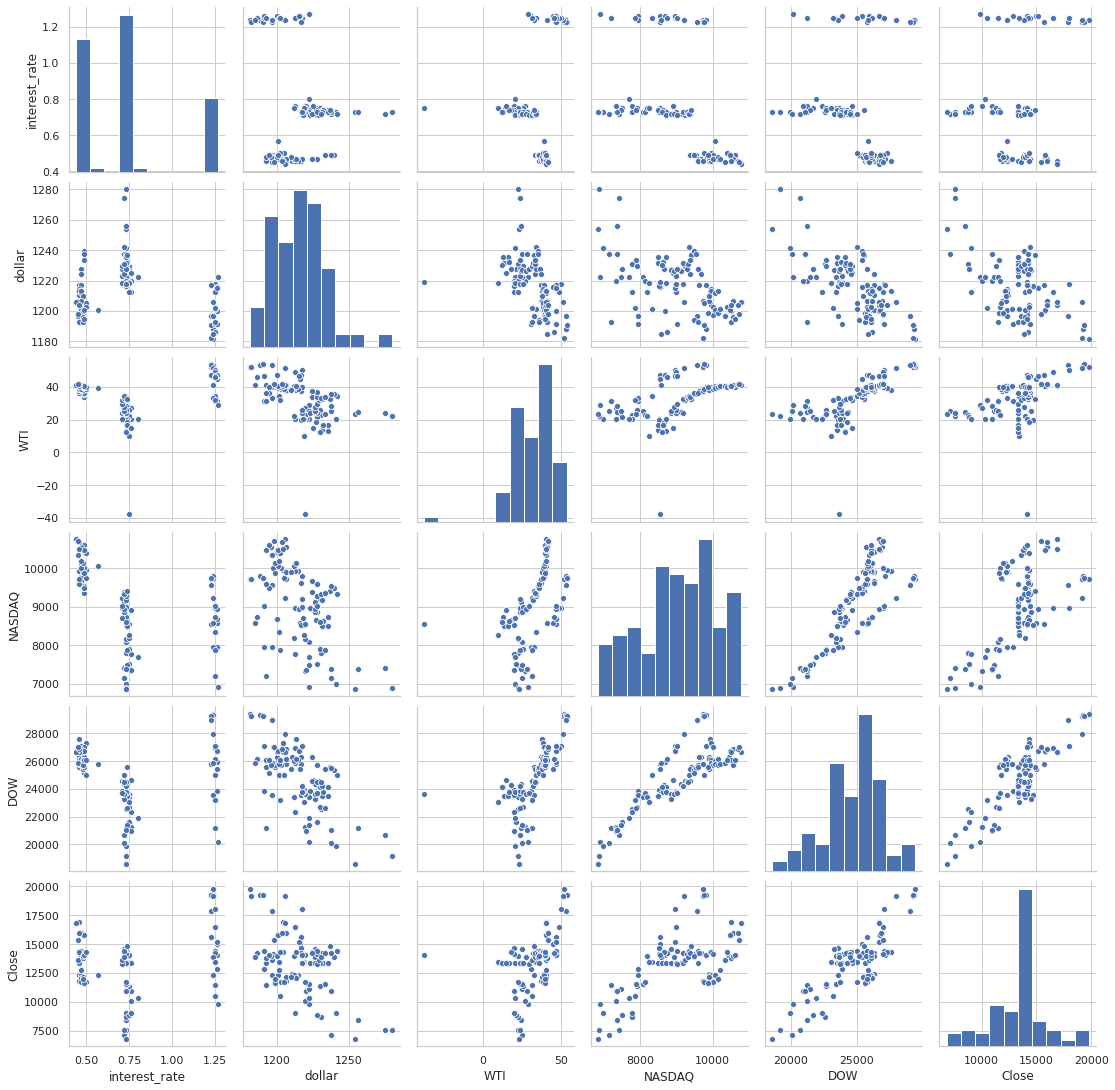

In [11]:
#################################################################################################
# 키이스트 종목의 다중회귀분석
# 산포행렬
sns.set(style='whitegrid')
sns.pairplot(top10[0][cols], height=2.5)
plt.show()

In [12]:
# 넘파이를 이용한 상관계수 획득
corr_tmp = np.corrcoef(top10[0][cols].values)

In [13]:
top10[0][cols].values.T
corr_tmp = np.corrcoef(top10[0][cols].values.T)
corr_tmp.shape

(6, 6)

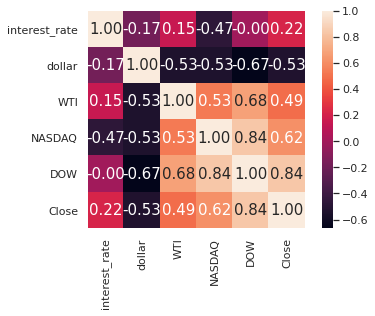

In [14]:
sns.heatmap(corr_tmp, cbar=True, annot=True, square=True, fmt='.2f',
            annot_kws={'size':15}, yticklabels=cols, xticklabels=cols)
plt.show()

In [15]:
columns = top10[0].columns[3:]
columns

Index(['dollar', 'WTI', 'NASDAQ', 'DOW', 'interest_rate'], dtype='object')

In [16]:
target_df = top10[0][columns]
target_df.head(2)

,dollar,WTI,NASDAQ,DOW,interest_rate
Date,,,,,
2020-02-14,1181.5,52.05,9731.18,29398.08,1.24
2020-02-18,1182.2,52.05,9732.74,29232.19,1.23


In [17]:
y_data = top10[0]['Close']
y_data.head(2)

Date
2020-02-14    19787
2020-02-18    19136
Name: Close, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(target_df, y_data, train_size=0.7, 
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((74, 5), (32, 5), (74,), (32,))

In [19]:
X_train_added = sm.add_constant(X_train)

In [20]:
full_model= sm.OLS(y_train, X_train_added)
full_model_res = full_model.fit()

In [21]:
print(full_model_res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     59.21
Date:                Wed, 29 Jul 2020   Prob (F-statistic):           1.96e-23
Time:                        08:59:59   Log-Likelihood:                -624.15
No. Observations:                  74   AIC:                             1260.
Df Residuals:                      68   BIC:                             1274.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.555e+04   1.66e+04     -3.958

In [22]:
top10[0]['name']['2020-02-14']

'키이스트'

In [23]:
from sklearn.metrics import r2_score

In [24]:
top10[0].tail(10)

,name,code,Close,dollar,WTI,NASDAQ,DOW,interest_rate
Date,,,,,,,,
2020-07-09,키이스트,54780,13950,1195.8,39.62,10547.75,25706.09,0.48
2020-07-10,키이스트,54780,14100,1194.5,39.62,10617.44,26075.30,0.49
2020-07-13,키이스트,54780,14350,1202.4,40.10,10390.84,26085.80,0.50
2020-07-14,키이스트,54780,15800,1200.3,40.29,10488.58,26642.59,0.48
2020-07-15,키이스트,54780,15950,1206.4,41.20,10550.49,26870.10,0.47
2020-07-16,키이스트,54780,15800,1200.7,40.75,10473.83,26734.71,0.49
2020-07-17,키이스트,54780,16900,1204.1,40.59,10503.19,26671.95,0.46
2020-07-20,키이스트,54780,16850,1205.7,40.81,10767.09,26680.87,0.44
2020-07-21,키이스트,54780,16000,1203.7,41.96,10680.36,26840.40,0.46


#######################################################
######################### 키이스트 #########################
#######################################################


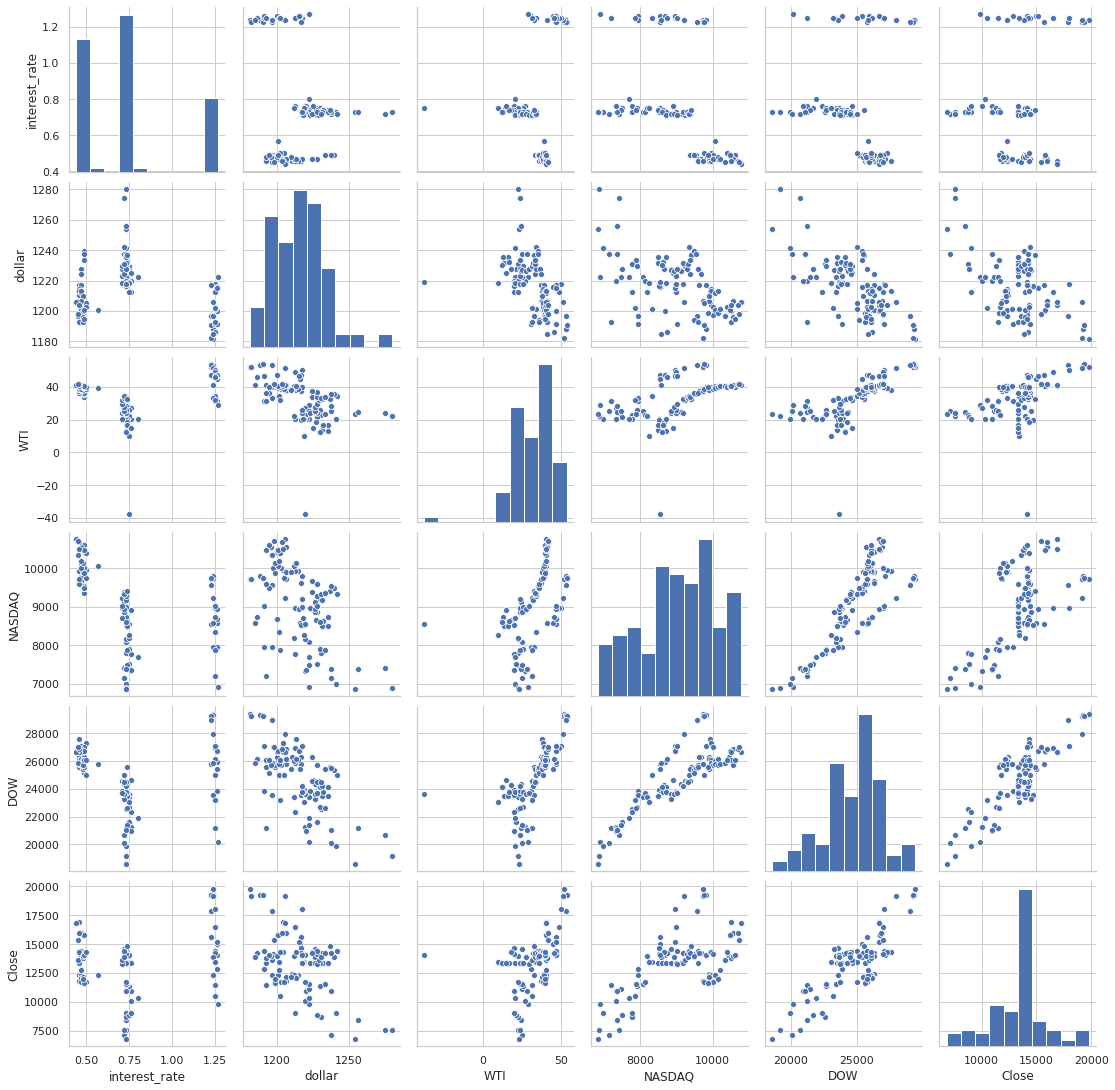

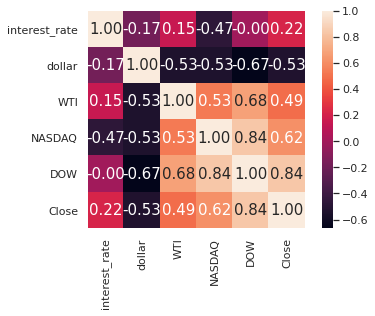

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     59.21
Date:                Wed, 29 Jul 2020   Prob (F-statistic):           1.96e-23
Time:                        09:00:09   Log-Likelihood:                -624.15
No. Observations:                  74   AIC:                             1260.
Df Residuals:                      68   BIC:                             1274.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.555e+04   1.66e+04     -3.958

NameError: ignored

In [25]:
#############################################################################

for i in range(10):
  print('#'*55)
  print('#'*25, top10[i]['name']['2020-02-14'], '#'*25)
  print('#'*55)
  sns.set(style='whitegrid')
  sns.pairplot(top10[i][cols], height=2.5)
  plt.show()
  corr_tmp = np.corrcoef(top10[i][cols].values.T)
  sns.heatmap(corr_tmp, cbar=True, annot=True, square=True, fmt='.2f',
              annot_kws={'size':15}, yticklabels=cols, xticklabels=cols)
  plt.show()
  target_df = top10[i][columns]
  y_data = top10[i]['Close']
  X_train, X_test, y_train, y_test = train_test_split(target_df, y_data, train_size=0.7, 
                                                      random_state=42)
  X_train.shape, X_test.shape, y_train.shape, y_test.shape
  X_train_added = sm.add_constant(X_train)
  full_model= sm.OLS(y_train, X_train_added)
  full_model_res = full_model.fit()
  print(full_model_res.summary())
  print(f'{"인덱스":20} {"R제곱값":10} {"다중공선성":10}')
  print('-'*60)
  # r제곱이 가장 컸을때
  best_r_idx  = -1
  best_rsqrd  = -1
  best_vif    = -1
  best_n1     = 0
  best_v_idx  = -1
  best_rsqrd2 = -1
  best_vif2   = 10
  best_n2     = 0
  for n in range(2, len(columns)):
    five_cols = [item for item in list(combinations(columns, n ))]
    for idx, col in enumerate(five_cols):
      m_model = sm.OLS( y_train, sm.add_constant(X_train[list(col)]))
      m_model_res = m_model.fit()
      vif = 1/(1-m_model_res.rsquared)
      if m_model_res.rsquared > best_rsqrd:
        best_rsqrd = m_model_res.rsquared
        best_r_idx = idx
        best_vif  = vif
        best_n1 = n

      if vif < best_vif2:
        best_v_idx  = idx
        best_rsqrd2 = m_model_res.rsquared
        best_vif2   = vif
        best_n2 = n
    
  # 결과 
  print("R제곱 기준", best_r_idx, best_rsqrd, best_vif, best_n1)
  print("VIF 기준", best_v_idx, best_rsqrd2, best_vif2, best_n2)
  print("최고의 조합 : ", five_cols[best_r_idx])

  m_model = sm.OLS( y_train, sm.add_constant(X_train[list(five_cols[best_r_idx])]))
  m_model_res = m_model.fit()
  target_cols = list(five_cols[best_r_idx])
  # 예측할때 데이터도 동일하게 맞춰준다
  y_pred = m_model_res.predict( sm.add_constant(X_test[target_cols]))
  print(y_pred)
  print('성능평가 결과 : ', r2_score(y_test, y_pred))
  plt.scatter(y_test, y_pred, alpha=0.5)
  plt.xlabel("Actual Rent")
  plt.ylabel("Predicted Rent")
  plt.show()

In [26]:
from itertools import permutations, combinations

In [27]:
top10[0].dtypes

name              object
code               int64
Close              int64
dollar           float64
WTI              float64
NASDAQ           float64
DOW              float64
interest_rate    float64
dtype: object